In [36]:
import pandas as pd
import os, glob, sys
import matplotlib.pyplot as plt
import json

In [19]:
dictn = dict()

In [22]:
for d in os.listdir(os.getcwd()):
    if 'nova' in d:
        files = glob.glob(os.path.join(os.getcwd(), d) + "/*.tsv")
        # print(f'{d}: {len(glob.glob(os.path.join(os.getcwd(), d) + "/*.tsv"))}')
        dictn_l = dict()
        for f in files:
            df = pd.read_csv(f, sep="\t")
            if len(df) > 0:
                dictn_l[os.path.basename(f).split('.')[0]] = len(df)
            else:
                continue
        dictn[d] = dictn_l
                

In [38]:
dictn.keys()

dict_keys(['novartis_data_flattened', 'novartis_only_smiles', 'novartis_only_uniprot_smiles'])

In [37]:
with open("novartis_noa_data.json", "w") as file:
    json.dump(dictn, file, indent=4)
    

In [27]:
new_dictn = dict()
for d in dictn.keys():
    List = []
    for k, v in dictn[d].items():
        List.append(v)
    new_dictn[d] = List
    

In [41]:
# new_dictn

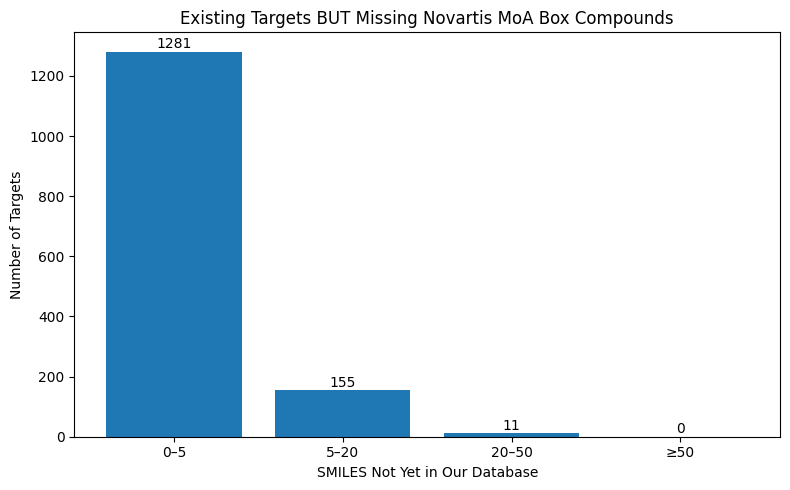

In [59]:
with open('./novartis_noa_data.json', 'r') as f:
    data = json.load(f)

counts = list(data['novartis_only_smiles'].values())

bins = [0, 5, 20, 50, float('inf')]
labels = ['0–5', '5–20', '20–50', '≥50']

bin_series = pd.cut(counts, bins=bins, labels=labels, right=True, include_lowest=True)
bin_counts = bin_series.value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(8, 5))
bars = plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('SMILES Not Yet in Our Database')
plt.ylabel('Number of Targets')
plt.title('Existing Targets BUT Missing Novartis MoA Box Compounds')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('moa_box_missing_smiles_for_existing_targets.png', dpi=1000)
plt.show()


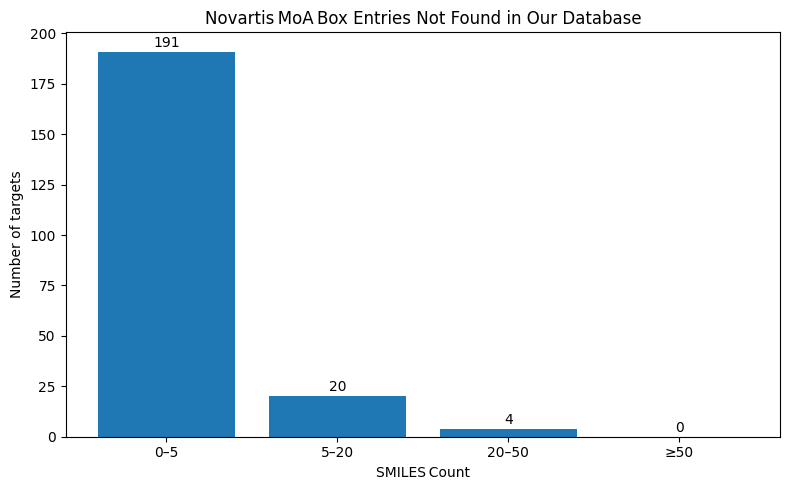

In [61]:
with open('./novartis_noa_data.json', 'r') as f:
    data = json.load(f)

counts = list(data['novartis_only_uniprot_smiles'].values())

bins = [0, 5, 20, 50, float('inf')]
labels = ['0–5', '5–20', '20–50', '≥50']

bin_series = pd.cut(counts, bins=bins, labels=labels, right=True, include_lowest=True)
bin_counts = bin_series.value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(8, 5))
bars = plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('SMILES Count')
plt.ylabel('Number of targets')
plt.title('Novartis MoA Box Entries Not Found in Our Database')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('moa_box_targets_and_smiles_missing_in_db.png', dpi=1000)
plt.show()


saved


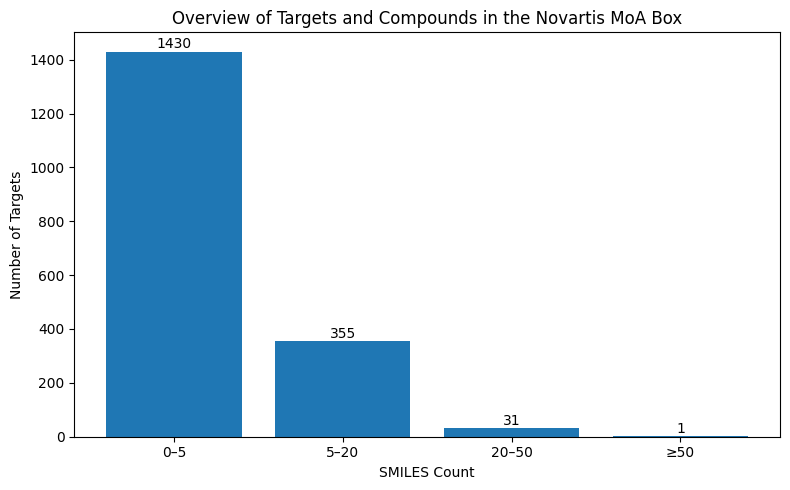

In [60]:
with open('./novartis_noa_data.json', 'r') as f:
    data = json.load(f)

counts = list(data['novartis_data_flattened'].values())

bins = [0, 5, 20, 50, float('inf')]
labels = ['0–5', '5–20', '20–50', '≥50']

bin_series = pd.cut(counts, bins=bins, labels=labels, right=True, include_lowest=True)
bin_counts = bin_series.value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(8, 5))
bars = plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('SMILES Count')
plt.ylabel('Number of Targets')
plt.title('Overview of Targets and Compounds in the Novartis MoA Box')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('novartis_moabox_data_overview.png', dpi=1000)


In [62]:
file_path = './novartis_noa_data.json'
with open(file_path, 'r') as f:
    data = json.load(f)

novartis_only_smiles = data['novartis_only_smiles']

df_all = pd.DataFrame(list(novartis_only_smiles.items()), columns=['protein target', 'smiles count'])

csv_path = './moa_box_missing_smiles_for_existing_targets.csv'
df_all = df_all.sort_values(by='smiles count', ascending=False)
df_all.to_csv(csv_path, index=False)


In [63]:
file_path = './novartis_noa_data.json'
with open(file_path, 'r') as f:
    data = json.load(f)

novartis_only_smiles = data['novartis_only_uniprot_smiles']

df_all = pd.DataFrame(list(novartis_only_smiles.items()), columns=['protein target', 'smiles count'])

csv_path = './moa_box_targets_and_smiles_missing_in_db.csv'
df_all = df_all.sort_values(by='smiles count', ascending=False)
df_all.to_csv(csv_path, index=False)


In [64]:
file_path = './novartis_noa_data.json'
with open(file_path, 'r') as f:
    data = json.load(f)

novartis_only_smiles = data['novartis_data_flattened']

df_all = pd.DataFrame(list(novartis_only_smiles.items()), columns=['protein target', 'smiles count'])

csv_path = './moa_box_targets_and_smiles_overview.csv'
df_all = df_all.sort_values(by='smiles count', ascending=False)
df_all.to_csv(csv_path, index=False)
